# Piyush Verma
# 09/10/2025
# 230968114
# Deep Learning Lab 9 (Batch A1)

## Importing required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

2025-10-09 10:51:16.415016: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-09 10:51:16.564523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759987276.640771   88896 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759987276.662502   88896 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759987276.791717   88896 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Loading pins face dataset

In [2]:
def load_images_from_subfolders(main_folder, img_size=(64, 64)):
    images = []
    for class_folder in os.listdir(main_folder):
        class_path = os.path.join(main_folder, class_folder)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = load_img(img_path, target_size=img_size)
                    img = img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
                    images.append(img)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    images = np.array(images)
    return images

## Splitting data into train and test sets

In [3]:
dataset_path = '105_classes_pins_dataset'  # Replace with your actual path

print("Loading images...")
images = load_images_from_subfolders(dataset_path)
print(f"Total images loaded: {len(images)}")

# Split data into train/test sets
x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)

Loading images...
Total images loaded: 17534


## Defining input image size and autoencoder architecture

In [4]:
input_img = Input(shape=(64, 64, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)  # 32x32x32
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # 16x16x16
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # 8x8x8

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # 16x16x8
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  # 32x32x16
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  # 64x64x32
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 64x64x3

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

I0000 00:00:1759987334.655483   88896 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10104 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,939 (54.45 KB)

 Trainable params: 13,939 (54.45 KB)

 Non-trainable params: 0 (0.00 B)

None


## Training auto encoder on clean images

In [5]:
print("Training autoencoder on clean images...")
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Training autoencoder on clean images...
Epoch 1/50


I0000 00:00:1759987346.987303  102729 service.cc:152] XLA service 0x7f7e9c0213c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759987346.987354  102729 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-10-09 10:52:27.099752: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759987347.583169  102729 cuda_dnn.cc:529] Loaded cuDNN version 91100


 21/439 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0831

I0000 00:00:1759987351.609705  102729 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 0.0379 - val_loss: 0.0141
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0137 - val_loss: 0.0123
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 9/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 10/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 11/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 12/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 

## Displaying recontructed images made by the autoencoder

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


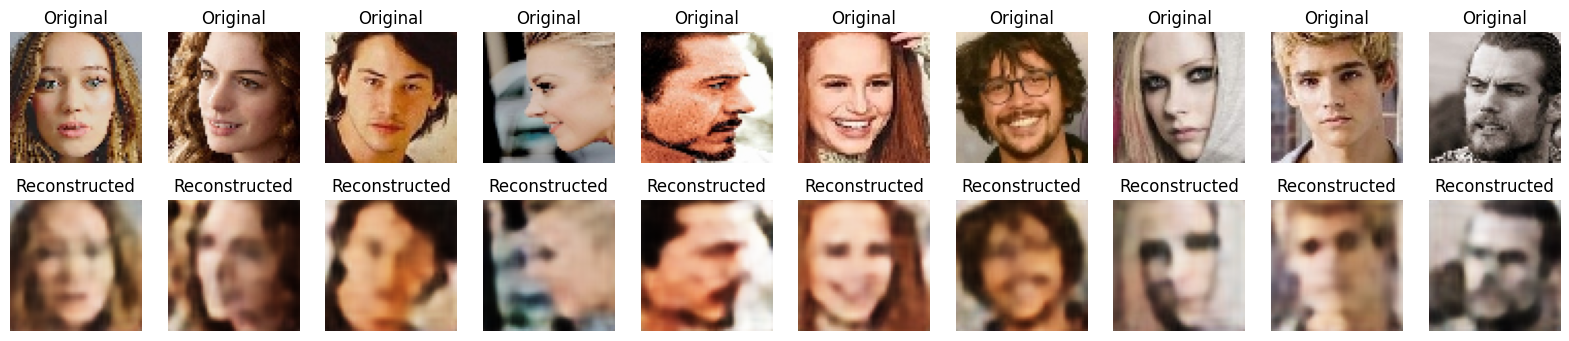

In [6]:
def plot_reconstructions(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

reconstructed_imgs = autoencoder.predict(x_test)
plot_reconstructions(x_test, reconstructed_imgs)

## Adding noise to images

In [7]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Training autoencoder for denoising

In [8]:
print("Training autoencoder for denoising...")
history_denoise = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Training autoencoder for denoising...
Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0143 - val_loss: 0.0100
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 9/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 10/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 11/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 12/50
4

## Visualizing denoised images

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


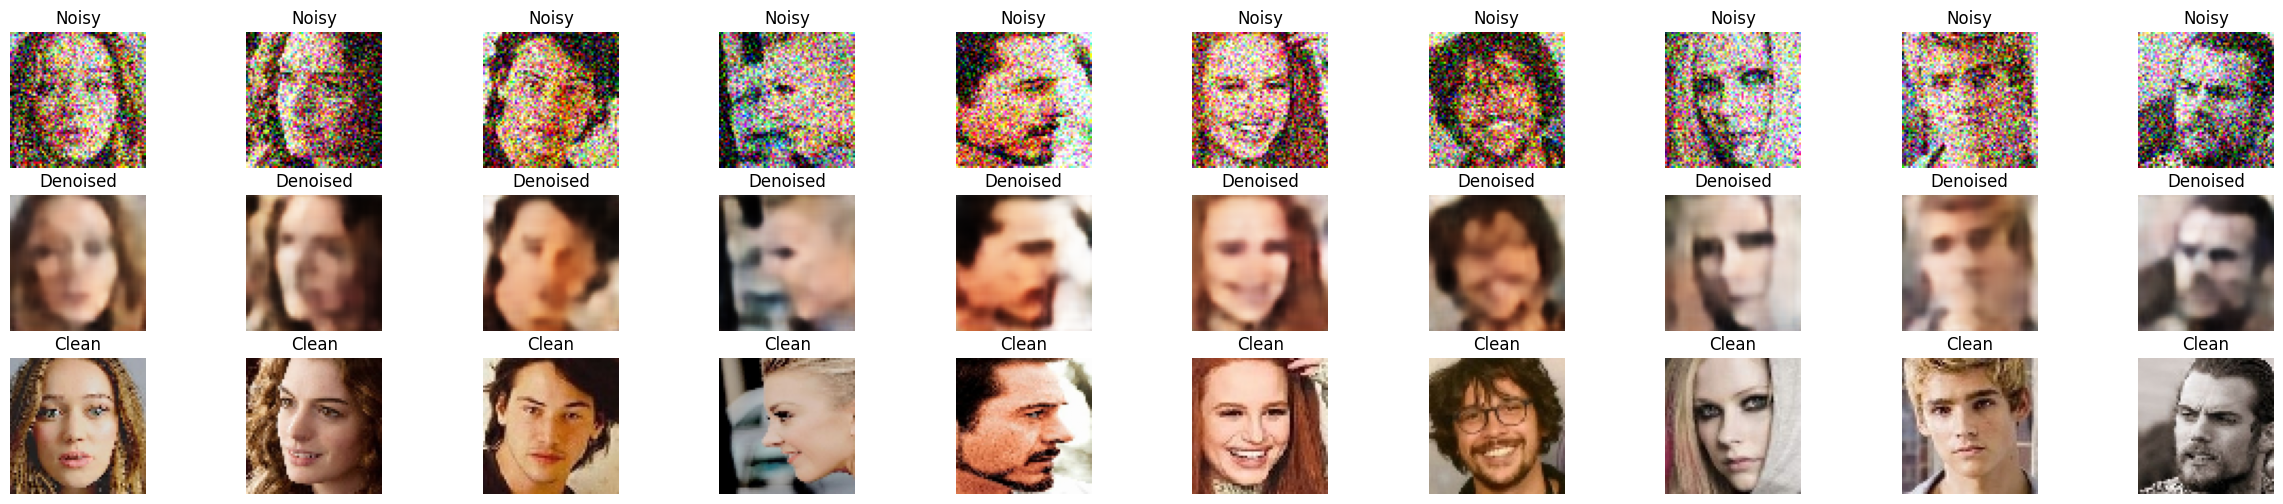

In [9]:
denoised_imgs = autoencoder.predict(x_test_noisy)

def plot_denoising(noisy, denoised, clean, n=10):
    plt.figure(figsize=(30, 6))
    for i in range(n):
        # Noisy
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i])
        plt.title("Noisy")
        plt.axis("off")

        # Denoised
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(denoised[i])
        plt.title("Denoised")
        plt.axis("off")

        # Original clean
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(clean[i])
        plt.title("Clean")
        plt.axis("off")

    plt.show()

plot_denoising(x_test_noisy, denoised_imgs, x_test)

# Save the model if needed
autoencoder.save('autoencoder_pinsface_denoising.h5')

## Visualizing training and loss curves for the reconstruction done by the autoencoder

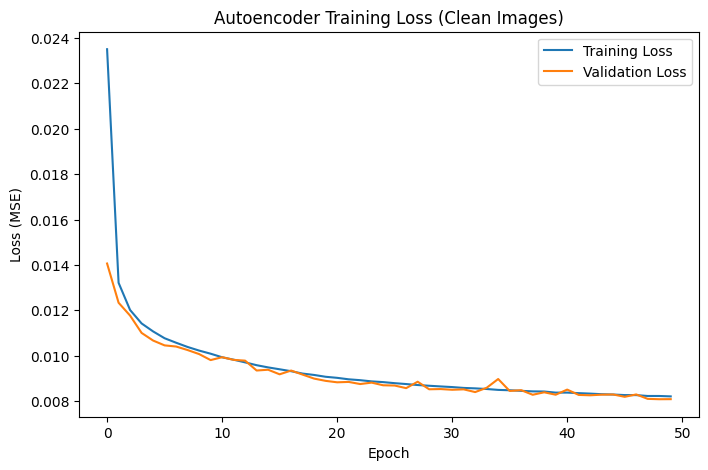

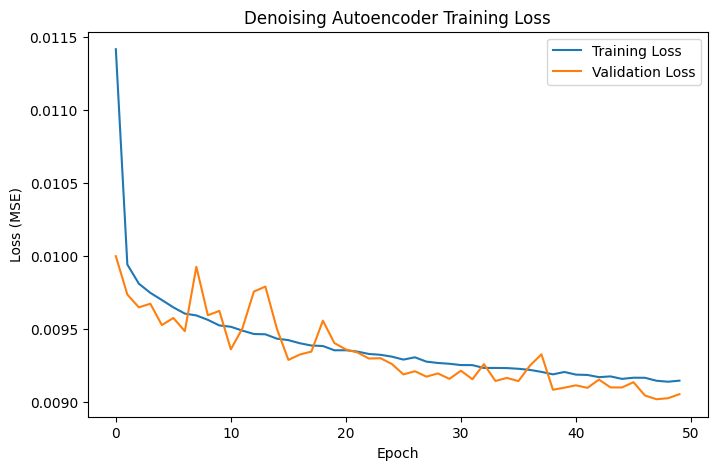

In [10]:
# Plot training & validation loss for reconstruction phase
def plot_loss(history, title="Model Loss"):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.ylabel('Loss (MSE)')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Plot loss for initial autoencoder training (clean images)
plot_loss(history, title="Autoencoder Training Loss (Clean Images)")

# Plot loss for denoising autoencoder training
plot_loss(history_denoise, title="Denoising Autoencoder Training Loss")


## Evaluating the autoencoder 

In [11]:
from sklearn.metrics import mean_squared_error
import math

def compute_mse(true_images, pred_images):
    return np.mean(np.square(true_images - pred_images))

def compute_psnr(true_images, pred_images, max_pixel=1.0):
    mse = compute_mse(true_images, pred_images)
    if mse == 0:
        return 100  # perfect reconstruction
    return 20 * math.log10(max_pixel / math.sqrt(mse))

# Compute metrics on test set for reconstruction
reconstruction_mse = compute_mse(x_test, reconstructed_imgs)
reconstruction_psnr = compute_psnr(x_test, reconstructed_imgs)

print(f"Reconstruction MSE: {reconstruction_mse:.6f}")
print(f"Reconstruction PSNR: {reconstruction_psnr:.2f} dB")

# Compute metrics on test set for denoising
denoising_mse = compute_mse(x_test, denoised_imgs)
denoising_psnr = compute_psnr(x_test, denoised_imgs)

print(f"Denoising MSE: {denoising_mse:.6f}")
print(f"Denoising PSNR: {denoising_psnr:.2f} dB")


Reconstruction MSE: 0.008087
Reconstruction PSNR: 20.92 dB
Denoising MSE: 0.009053
Denoising PSNR: 20.43 dB


## Reconstruction Metrics:

Reconstruction MSE: 0.008087 <br>
Reconstruction PSNR: 20.92 dB

## Inference:
The autoencoder is able to reconstruct the original face images with a fairly low mean squared error, which suggests that the model captures important features of the input data well. A PSNR around 20.9 dB indicates moderate reconstruction quality; the reconstructed images likely preserve most facial details but might show some noticeable artifacts or slight blurriness compared to the original images.

## Denoising Metrics:

Denoising MSE: 0.009053 <br>
Denoising PSNR: 20.43 dB

## Inference:
When the autoencoder is used for denoising (removing noise from corrupted face images), the MSE is slightly higher and PSNR is slightly lower than reconstruction, which is expected since denoising is a more challenging task than just reconstruction. A PSNR of ~20.4 dB still indicates reasonable denoising performance, meaning the model effectively removes noise but might leave some residual noise or distortions.

## Overall Takeaway:
The autoencoder performs slightly better on clean reconstruction than on denoising noisy inputs, but both tasks show decent quantitative performance.
PSNR values in the low 20s indicate moderate image quality — not perfect, but fairly good for practical face image applications.
Visual inspection of outputs is also important since PSNR and MSE alone don’t always reflect perceptual quality.